# import library

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind , shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# pandas option

In [62]:
pd.set_option('display.max_columns', None)

# library

In [63]:
df_control = pd.read_csv("control_group.csv", sep=";")
df_test = pd.read_csv("test_group.csv",sep=";")

# check data

In [64]:
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


# contact dataset

In [66]:
df_control["Group"] = "control"
df_test["Group"] = "test"

df = pd.concat([df_control, df_test], ignore_index=True)

del df_control , df_test


In [67]:
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,control
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,control
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control


# rename

In [68]:
df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase', 'Group'],
      dtype='object')

In [69]:
df.rename(columns={
    "Campaign Name" : "Campaign_Name",
    "Spend [USD]":"Spend",
    '# of Impressions':"Impressions",
    '# of Website Clicks':"Website_Clicks",
    '# of Searches':"Searches",
    '# of View Content':"View_Content",
    '# of Add to Cart':"Add_To_Cart",
    '# of Purchase':"Purchase"
},inplace=True)
df.head()


,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_To_Cart,Purchase,Group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,control
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,control
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control


# check null value

In [70]:
df.isnull().sum()

Campaign_Name     0
Date              0
Spend             0
Impressions       1
Reach             1
Website_Clicks    1
Searches          1
View_Content      1
Add_To_Cart       1
Purchase          1
Group             0
dtype: int64

In [71]:
df.isnull().mean()*100

Campaign_Name     0.000000
Date              0.000000
Spend             0.000000
Impressions       1.666667
Reach             1.666667
Website_Clicks    1.666667
Searches          1.666667
View_Content      1.666667
Add_To_Cart       1.666667
Purchase          1.666667
Group             0.000000
dtype: float64

In [72]:
df[df["Impressions"].isnull()]

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_To_Cart,Purchase,Group
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control


In [73]:
df.dropna(inplace=True)

# data type

In [74]:
df.dtypes

Campaign_Name      object
Date               object
Spend               int64
Impressions       float64
Reach             float64
Website_Clicks    float64
Searches          float64
View_Content      float64
Add_To_Cart       float64
Purchase          float64
Group              object
dtype: object

In [75]:
df.head()

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_To_Cart,Purchase,Group
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,control
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,control
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,control
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,control
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,control


In [76]:
df = df.astype({
    "Impressions":"int",
    "Reach":"int",
    "Website_Clicks":"int",
    "Searches":"int",
    "View_Content":"int",
    "Add_To_Cart":"int",
    "Purchase":"int"
})

In [77]:
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y")

In [78]:
df.dtypes

Campaign_Name             object
Date              datetime64[ns]
Spend                      int64
Impressions                int32
Reach                      int32
Website_Clicks             int32
Searches                   int32
View_Content               int32
Add_To_Cart                int32
Purchase                   int32
Group                     object
dtype: object

In [79]:
df.head()

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_To_Cart,Purchase,Group
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618,control
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511,control
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372,control
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340,control
5,Control Campaign,2019-08-06,3083,109076,87998,4028,1709,1249,784,764,control


In [80]:
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y")

In [81]:
df.dtypes

Campaign_Name             object
Date              datetime64[ns]
Spend                      int64
Impressions                int32
Reach                      int32
Website_Clicks             int32
Searches                   int32
View_Content               int32
Add_To_Cart                int32
Purchase                   int32
Group                     object
dtype: object

# add feature

In [82]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

In [83]:
df["Click_Through_Rate"] = df["Website_Clicks"] / df["Impressions"]
df["Purchase_Rate"] = df["Purchase"] / df["Website_Clicks"]
df["Conversion_Rate"] = df["Purchase"] / df["Impressions"]

In [84]:
df["Cost_Per_Purchase"] = df["Spend"] / df["Purchase"]
df["Cost_Per_Click"] = df["Spend"] / df["Website_Clicks"]

In [85]:
df.head()

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_To_Cart,Purchase,Group,Year,Month,Day,Weekday,Click_Through_Rate,Purchase_Rate,Conversion_Rate,Cost_Per_Purchase,Cost_Per_Click
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618,control,2019,8,1,Thursday,0.084835,0.088084,0.007473,3.689320,0.324971
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511,control,2019,8,2,Friday,0.067003,0.063009,0.004222,3.438356,0.216646
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372,control,2019,8,3,Saturday,0.049411,0.057160,0.002824,6.298387,0.360018
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340,control,2019,8,4,Sunday,0.042057,0.110930,0.004665,5.705882,0.632953
5,Control Campaign,2019-08-06,3083,109076,87998,4028,1709,1249,784,764,control,2019,8,6,Tuesday,0.036928,0.189672,0.007004,4.035340,0.765392


In [86]:
def get_group_data(df, group_col='Group', value_col='Purchase'):
    """
    Extracts control and test group series from DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    group_col (str): Column name indicating group membership.
    value_col (str): Column name of values to extract.

    Returns:
    tuple: (control_series, test_series)
    """
    control = df[df[group_col] == 'control'][value_col]
    test = df[df[group_col] == 'test'][value_col]
    return control, test

In [87]:
control, test = get_group_data(df)

In [88]:
def perform_t_test(control, test, alpha=0.05):
    """
    Performs an independent two-sample t-test.

    Parameters:
    control (array-like): Control group data.
    test (array-like): Test group data.
    alpha (float): Significance level.

    Returns:
    dict: t-statistic, p-value, and decision string.
    """
    t_stat, p_val = ttest_ind(control, test)
    decision = 'Significant difference' if p_val < alpha else 'Not significant'
    return {'t_stat': t_stat, 'p_value': p_val, 'decision': decision}

In [89]:
ttest_results = perform_t_test(control, test)
print(f"T-statistic: {ttest_results['t_stat']:.4f}")
print(f"P-value: {ttest_results['p_value']:.4f}")
print(ttest_results['decision'])

T-statistic: 0.0301
P-value: 0.9761
Not significant


In [109]:
result = {
    "T-statistic": [ttest_results["t_stat"] ],
    "P-value": [ ttest_results["p_value"]]
}
result = pd.DataFrame(result)
result.to_csv('generate\\t_test_result.csv', index=False)

In [91]:
def compare_kpis(df, kpis=None, group_col='Group'):
    """
    Compares mean values of specified KPIs between control and test groups.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    kpis (list): List of KPI column names.
    group_col (str): Column name indicating group membership.

    Returns:
    pd.DataFrame: Comparison table with control mean, test mean, difference, and percent change.
    """
    if kpis is None:
        kpis = ['Purchase', 'Click_Through_Rate', 'Conversion_Rate', 'Cost_Per_Purchase']
    results = []
    for kpi in kpis:
        control_mean = df[df[group_col] == 'control'][kpi].mean()
        test_mean = df[df[group_col] == 'test'][kpi].mean()
        diff = test_mean - control_mean
        pct_change = (diff / control_mean * 100) if control_mean != 0 else np.nan
        results.append({
            'KPI': kpi,
            'Control_Mean': control_mean,
            'Test_Mean': test_mean,
            'Difference': diff,
            'Percent_Change': pct_change
        })
    return pd.DataFrame(results)

In [92]:
kpi_comparison = compare_kpis(df)
print(kpi_comparison)

                  KPI  Control_Mean   Test_Mean  Difference  Percent_Change
0            Purchase    522.793103  521.233333   -1.559770       -0.298353
1  Click_Through_Rate      0.050959    0.102423    0.051464      100.991349
2     Conversion_Rate      0.005001    0.008425    0.003424       68.475871
3   Cost_Per_Purchase      5.052339    5.899589    0.847251       16.769476


# sort column

In [93]:
df.columns

Index(['Campaign_Name', 'Date', 'Spend', 'Impressions', 'Reach',
       'Website_Clicks', 'Searches', 'View_Content', 'Add_To_Cart', 'Purchase',
       'Group', 'Year', 'Month', 'Day', 'Weekday', 'Click_Through_Rate',
       'Purchase_Rate', 'Conversion_Rate', 'Cost_Per_Purchase',
       'Cost_Per_Click'],
      dtype='object')

In [94]:
column_order = [
    'Campaign_Name',
    'Group',
    'Date', 'Year', 'Month', 'Day', 'Weekday',

    'Spend', 'Impressions', 'Reach',
    'Website_Clicks', 'Searches', 'View_Content', 'Add_To_Cart', 'Purchase',

    'Click_Through_Rate', 'Purchase_Rate', 'Conversion_Rate',
    'Cost_Per_Click', 'Cost_Per_Purchase',
]

df = df[column_order]

del column_order

# visioulation

In [95]:
df.describe()

,Date,Year,Month,Day,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_To_Cart,Purchase,Click_Through_Rate,Purchase_Rate,Conversion_Rate,Cost_Per_Click,Cost_Per_Purchase
count,59,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2019-08-15 16:16:16.271186432,2019.0,8.0,15.677966,2435.762712,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000,0.077127,0.103352,0.006742,0.481591,5.483144
min,2019-08-01 00:00:00,2019.0,8.0,1.000000,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000,0.018575,0.030088,0.001831,0.216646,2.253750
25%,2019-08-08 12:00:00,2019.0,8.0,8.500000,2113.500000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000,0.042786,0.063322,0.004125,0.328357,3.494772
50%,2019-08-16 00:00:00,2019.0,8.0,16.000000,2421.000000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000,0.063799,0.088084,0.005780,0.429490,4.789668
75%,2019-08-23 00:00:00,2019.0,8.0,23.000000,2743.000000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000,0.084525,0.130510,0.007894,0.586896,7.520500
max,2019-08-30 00:00:00,2019.0,8.0,30.000000,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000,0.338218,0.322354,0.022734,1.037626,12.702041
std,NaN,0.0,0.0,8.692924,376.358795,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917,0.056291,0.058098,0.004342,0.199246,2.503649


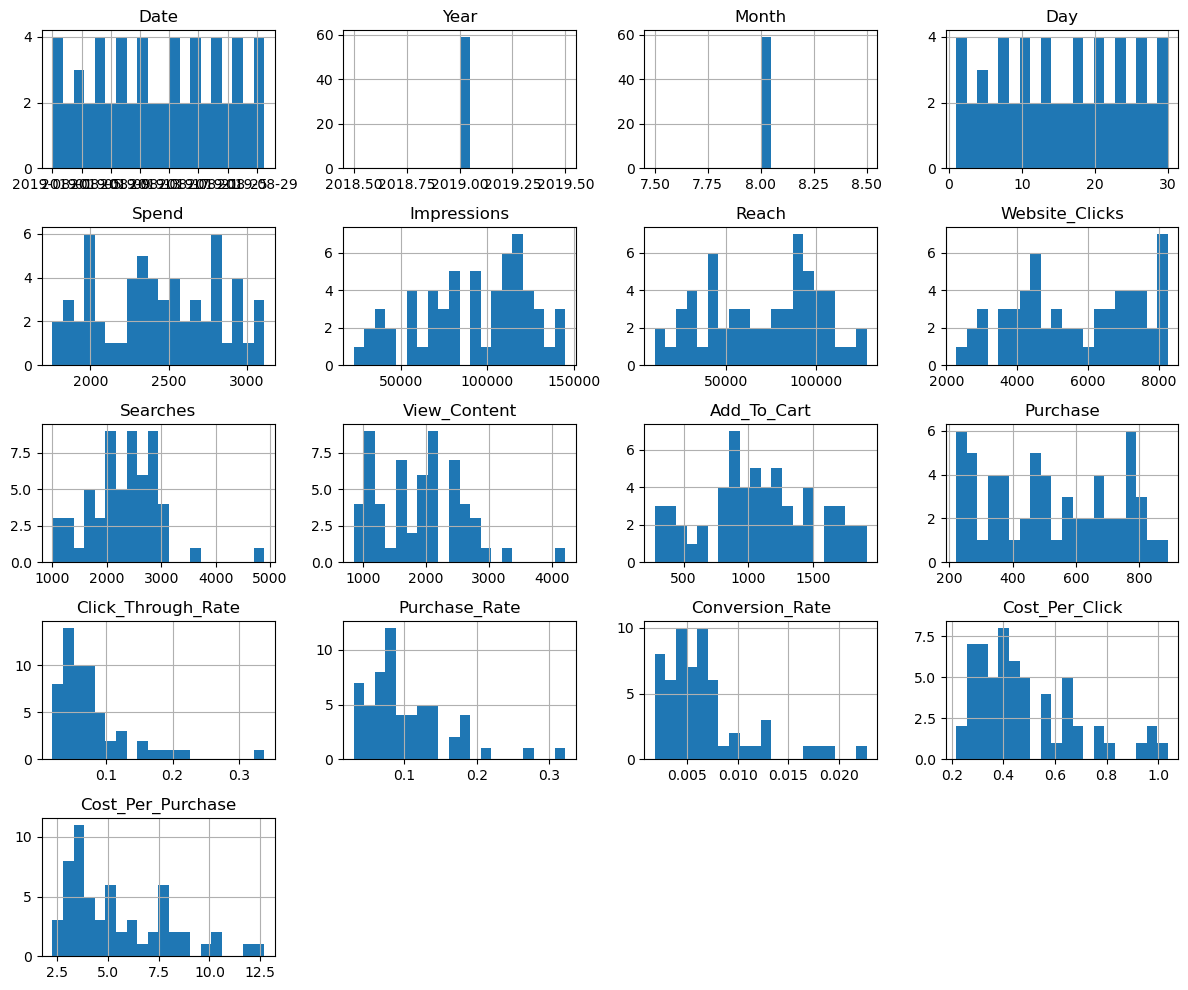

In [96]:
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

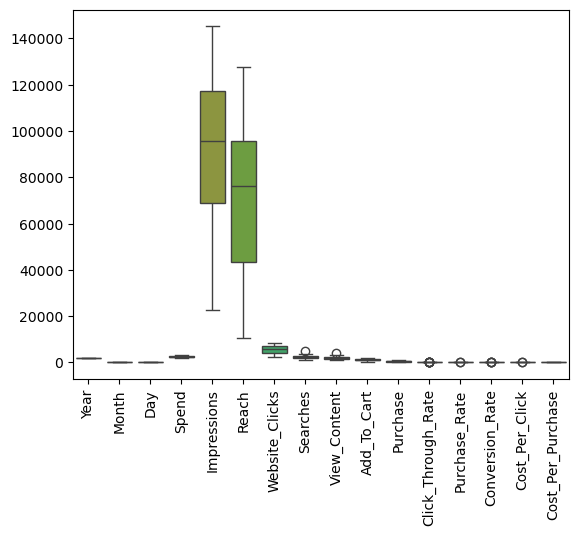

In [97]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [98]:
numric = df.select_dtypes(include=[np.number])

corr = numric.corr()

corr

,Year,Month,Day,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_To_Cart,Purchase,Click_Through_Rate,Purchase_Rate,Conversion_Rate,Cost_Per_Click,Cost_Per_Purchase
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,NaN,NaN,1.000000,-0.087083,0.074663,0.106676,-0.006778,0.252646,0.215777,-0.104584,-0.057646,-0.005262,-0.088197,-0.060801,-0.119680,0.034776
Spend,NaN,NaN,-0.087083,1.000000,-0.061667,-0.111151,-0.057257,0.021775,-0.020850,-0.143060,0.031446,0.079000,0.006883,0.140708,0.404270,0.318410
Impressions,NaN,NaN,0.074663,-0.061667,1.000000,0.888076,-0.211908,-0.176981,-0.066400,0.279214,0.051899,-0.776944,0.229068,-0.698198,0.149620,-0.075054
Reach,NaN,NaN,0.106676,-0.111151,0.888076,1.000000,-0.271639,-0.126307,-0.035573,0.241364,0.038860,-0.701465,0.259603,-0.610093,0.174113,-0.062798
Website_Clicks,NaN,NaN,-0.006778,-0.057257,-0.211908,-0.271639,1.000000,0.369445,0.418337,-0.000277,-0.033163,0.560735,-0.651607,0.222125,-0.875523,-0.018755
Searches,NaN,NaN,0.252646,0.021775,-0.176981,-0.126307,0.369445,1.000000,0.890481,0.029575,0.035524,0.258074,-0.174274,0.147256,-0.340099,-0.078132
View_Content,NaN,NaN,0.215777,-0.020850,-0.066400,-0.035573,0.418337,0.890481,1.000000,0.148539,0.059368,0.243670,-0.168929,0.135505,-0.387416,-0.116225
Add_To_Cart,NaN,NaN,-0.104584,-0.143060,0.279214,0.241364,-0.000277,0.029575,0.148539,1.000000,0.385706,-0.199642,0.304106,0.041432,0.014996,-0.432527


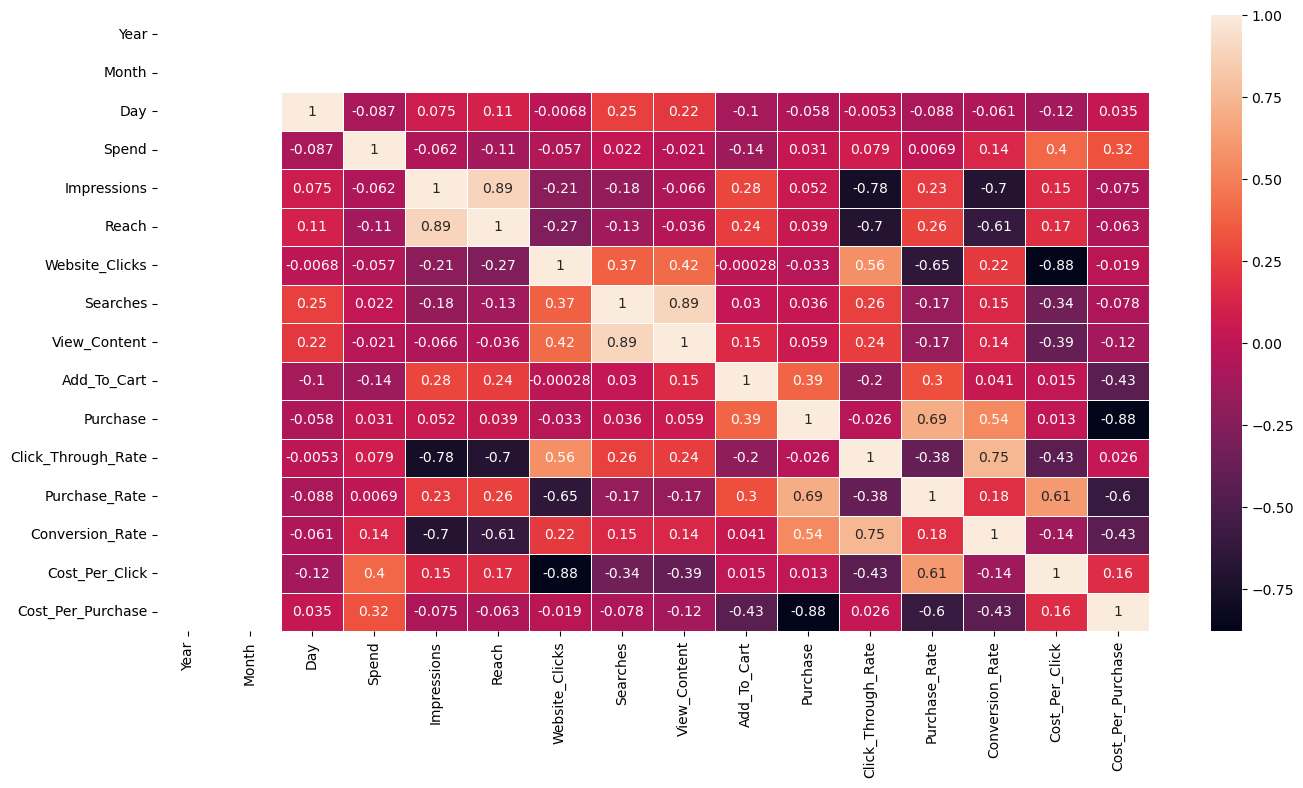

In [99]:
plt.figure(figsize=(16,8))

sns.heatmap(corr , annot=True , linewidths=0.5)

plt.show()


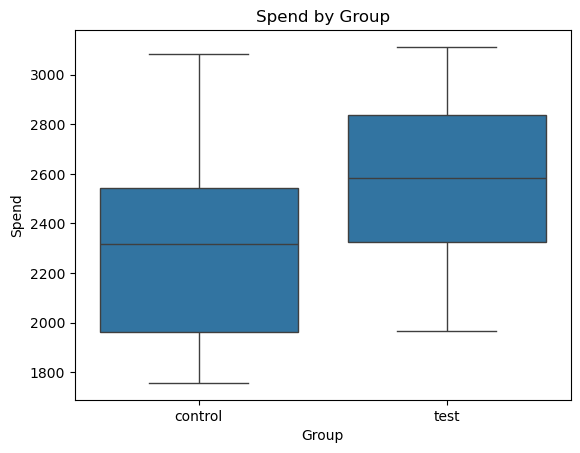

In [100]:
sns.boxplot(x='Group', y='Spend', data=df)
plt.title('Spend by Group')
plt.show()

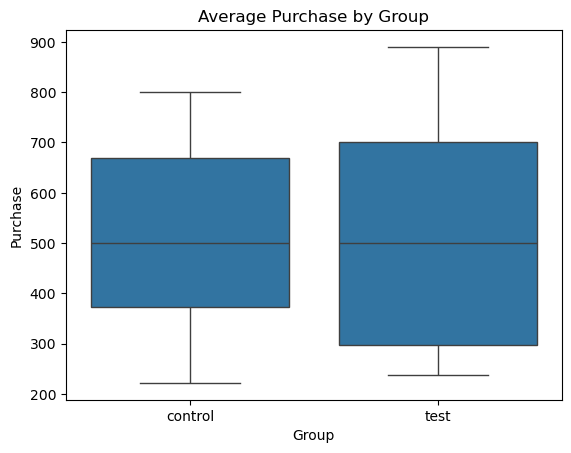

In [101]:
sns.boxplot(x='Group', y='Purchase', data=df)
plt.title('Average Purchase by Group')
plt.show()

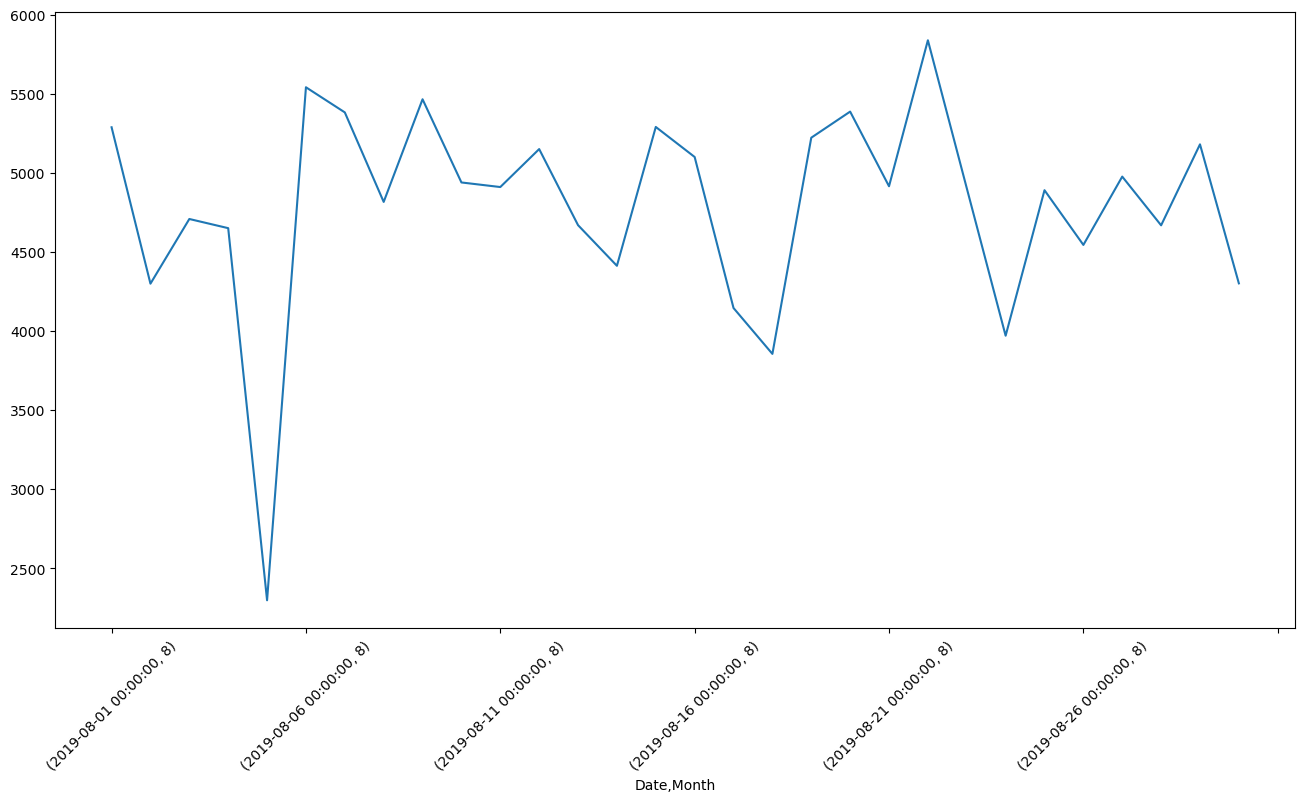

In [102]:
plt.figure(figsize=(16,8))
df.groupby(["Date","Month"])["Spend"].sum().plot(kind="line")
plt.xticks(rotation=45)
plt.show()

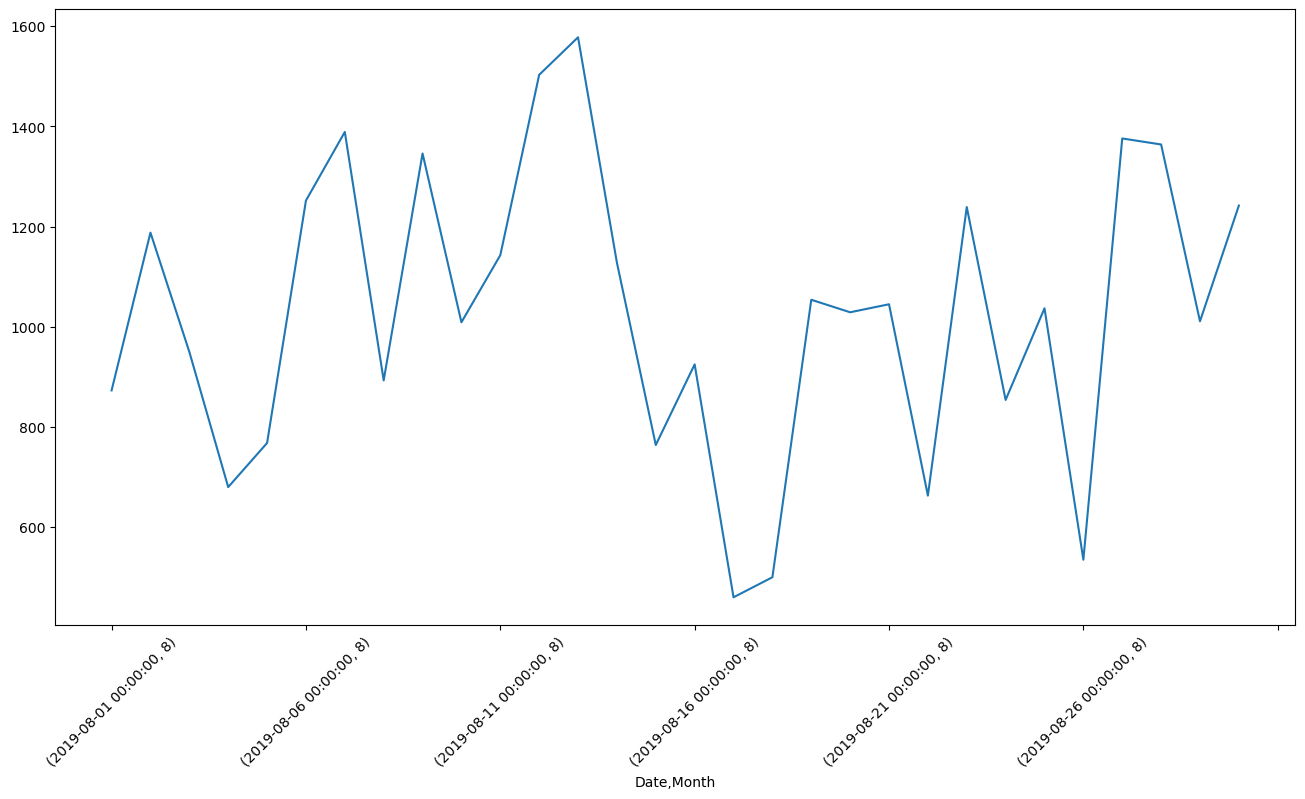

In [103]:
plt.figure(figsize=(16,8))
df.groupby(["Date","Month"])["Purchase"].sum().plot(kind="line")
plt.xticks(rotation=45)
plt.show()

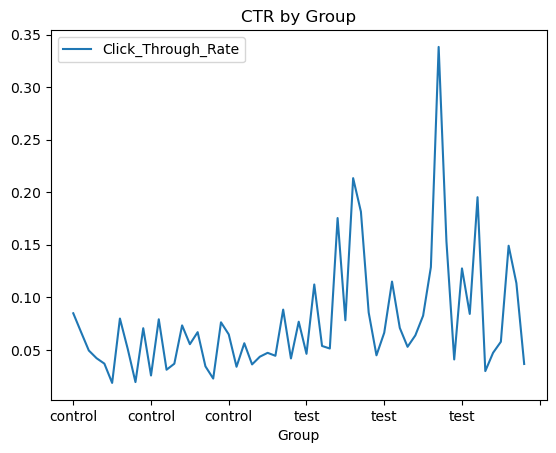

In [104]:
df.plot(x='Group', y='Click_Through_Rate')
plt.title('CTR by Group')
plt.show()

In [105]:
def plot_distributions(df, group_col='Group'):
    """
    Creates boxplots for Purchase and Conversion Rate distributions by group.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    group_col (str): Column name indicating group membership.
    """
    plt.figure(figsize=(12, 6))

    # Purchase distribution
    plt.subplot(1, 2, 1)
    sns.boxplot(x=group_col, y='Purchase', data=df)
    plt.title('Purchase Distribution by Group')

    # Conversion Rate distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(x=group_col, y='Conversion_Rate', data=df)
    plt.title('Conversion Rate Distribution by Group')

    plt.tight_layout()
    plt.show()


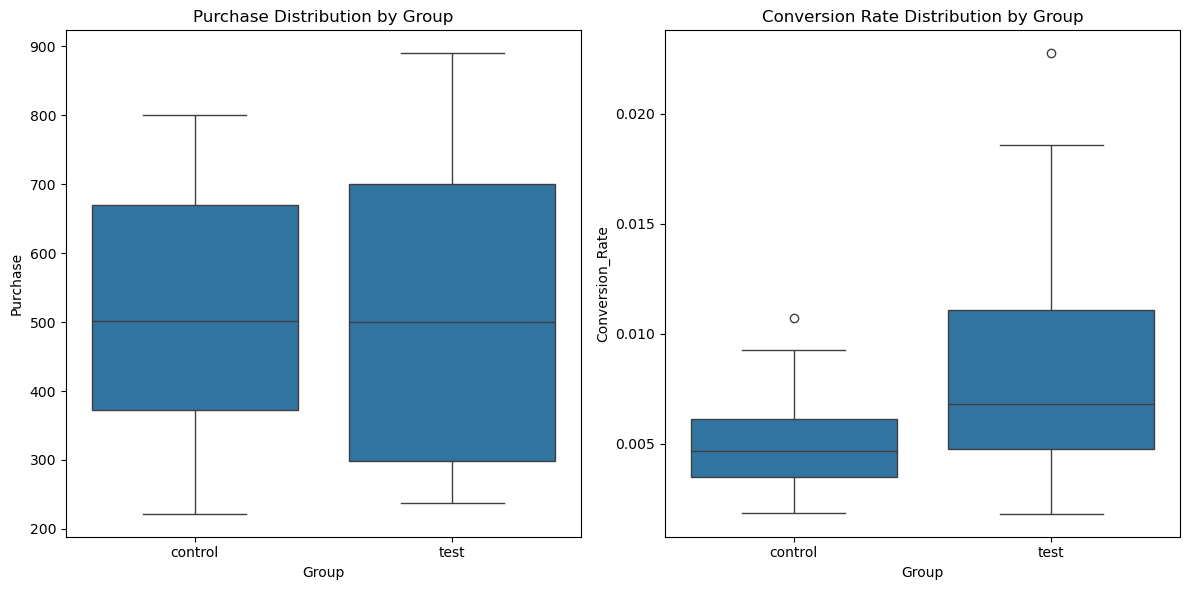

In [106]:
plot_distributions(df)

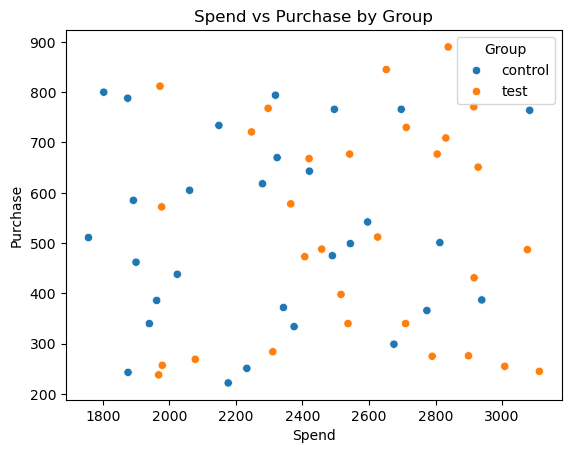

In [107]:
sns.scatterplot(x=df["Spend"], y=df["Purchase"], hue=df["Group"])
plt.title("Spend vs Purchase by Group")
plt.show()

# export

In [108]:
df.to_excel("generate/final_ab_test_output.xlsx", index=False)